# Project - The Battle of Polytopia
By Pusti Jesrani and Harshal Kanade


## Table of Contents
1. Introduction
2. Mathematical Models
3. Solutions in Julia
4. Results and Analysis
5. Conclusion
6. Work Cited

## 1. Introduction
Optimizing the fastest method of developing products has been a problem tackled by many generations and past generations. For this project, we decided to undertake a fun and interesting task - __optimizing the early-game strategy for a game named The Battle of Polytopia.__ 

The Battle of Polytopia is a turn-based strategy game (similar to the famous Civilization series), in which each player rules a Polytopian tribe on a map called the Square - which, like the name implies, is a big square that consists of square tiles. In each game, the players compete for the victory (either by conquering all other tribes or scoring the most by the end of the time frame) by exploring the world, expanding their territories, exploiting the resources, and exterminating their opponents. A detailed explanation of the game mechanics can be found on [The Battle of Polytopia Official Wiki](https://polytopia.fandom.com/wiki/The_Battle_of_Polytopia_Wiki).

In the past, many players and fans of the game have formulated early-game strategies on online communities like the [Polytopia Wiki/Strategies](https://polytopia.fandom.com/wiki/Strategies) and [r/Polytopia on Reddit](https://www.reddit.com/r/Polytopia/). However, those strategies are mostly based on experience, and are usually so broad that they can only be used as a general guidance rather than specific instructions. The outcomes are not guaranteed to be the best for a specific scenario. Therefore, our project contributes to the existing literature by building optimization models that return specific instructions that are optimized for the scenario given.

Although there are many different configurations in the game, in this project, we will only look at an island map (so each player starts alone on one island), with the victory condition being to conquer all other tribes. In this case, because all players are separated from each other, the number and strategies of other players should not influence our decision, and the player's decision becomes completely deterministic on the outcome. Moreover, since there is no military threat from outside, there is no need to maintain an army at this point. Thus, we can safely disregard units recruitment in our models. We also assume that players have knowledge of all tiles and villages (a center for production of _stars_, the currency in the game) on the island, so there are no unknown factors in the game. Further simplications will also be made, and we will discuss those in the next sections.

Finally, with all those settings and assumptions, we can reasonably and formally propose our __objective__ in this project - __to maximize the production of stars by the end of Turn 12__.

We obtained map generation data in a GitHub repository named [Polytopia Map Generator](https://quasistellar.github.io/Polytopia-Map-Generator/). We used that site to create a very basic map with minimal landmass to apply our model. We use the following information from the map in our models:
* Villages on the island
* Distances between the villages
* Resources available

After entering the information of the map being used, we run through a combination of two Mixed-Integer Programming models using Julia, JuMP, and Gurobi. The first model (Model of Expansion) optimizes how the sole unit of "warrior" moves to expand the list of villages the player controls. The second model (Model of Resources Management) takes results from the first model to decide how stars should be invested to maximize the production of stars by the end of turn 10 - our main objective. Section 2 will discuss those models in detail, and Section 3 will solve those models using data from an example.

In section 4, we will display and discuss the results of our models. 

in Section 5, we will conclude our findings and discuss their implications.


## 2. Mathematical Models

### 2a. Model of Expansion

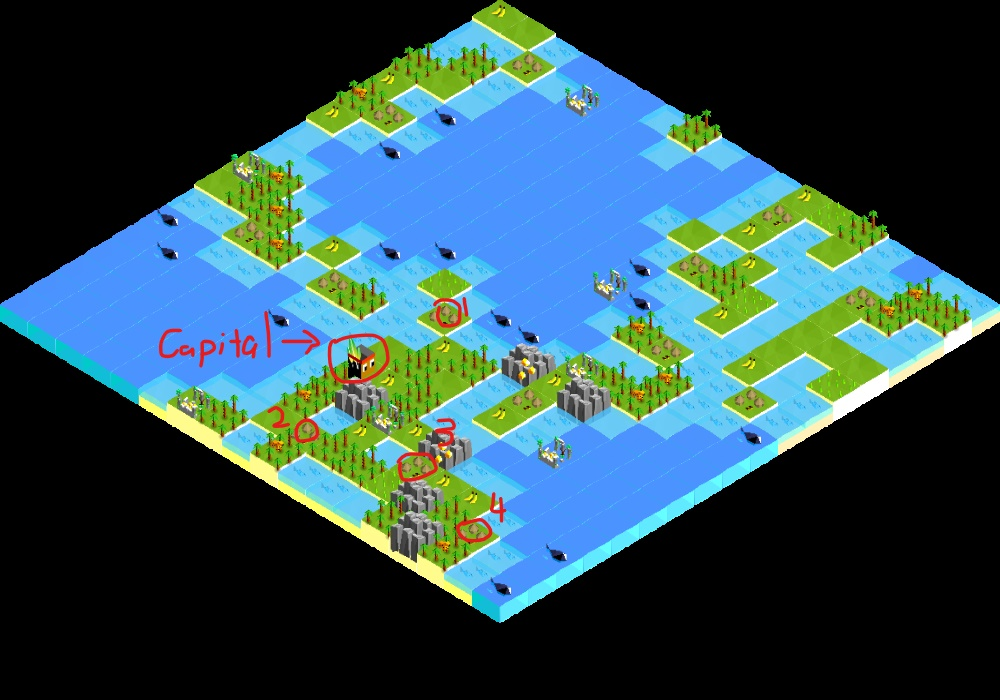
#### 2.a.1. Data

### 2b. Model of Resources Management

 $\begin{align*}  \max & \sum_{k \in K, j \in J}s_{k,j}  \\ 
    \textit{s.t.  } & (1) \\
    & inv_1 - C_a*\sum_{a \in A} build_{a,j,1}  \le inv_2 \\ 
    & inv_k - C_a*\sum_{a \in A} build_{a,j,k} + s_{k,j}  \le inv_{k+1} \quad \forall j \in J, k \in K[2:end] \\  
    &  inv_1 \le 5 \\
    & -inv_1 \le -5 \\
    & (2) \\
    & s_{k+1,j} - s_{k,j} \le \sum_{a \in A} build_{a,j,k} + occupy_{k,j}*occturn_{k,j} \quad \forall j \in J, k \in K \\ 
    &  - s_{k+1,j} + s_{k,j} \le - \sum_{a \in A} build_{a,j,k} - occupy_{k,j}*occturn_{k,j}  \quad \forall j \in J, k \in K \\
     &  s_{1,j} \le intial_j \quad \forall j \in J \\
    &  -s_{1,j} \le -intial_j \quad \forall j \in J \\
    & (3) \\
    &  build_{a,j,k} \le occupy_{k,j} \quad \forall a \in A ,j \in J, k \in K\\
    & \sum_{k \in K} build_{a,j,k} \quad  \le supply_{a,j}  \quad \forall a\in A,j \in J \\ 
    & -inv_k + C_a*\sum_{a \in A} build_{a,j,k}  \le 0 \quad \forall j \in J, k \in K\\   
    & (4) \\
    & s_{k,j} \ge 0 \quad \forall j \in J, k \in K\\
    & inv_k \ge 0 \quad \forall k \in K\\
    &  build_{a,j,k} \in {0,1} \quad \forall a \in A ,j \in J, k \in K
\end{align*}$ 


<br> This model is an MIP model

<br><u>Decision Variables</u>
<br>s_k,j is the production from each village j at the end of turn k.
<br>inv_k is the inventory after each turn k
<br>build_a,j,k is a binary variable that tracks whether we chose to do certain actions each turn. Since it is binary, only one of each action may occur per turn.

<br><u>Data</u>
<br>Supply_j,a is the supply of actions a available at each village j
<br>Occupy_k,j is a binary matrix displaying whether a village j is currently occupied on turn k
<br>Occturn_k,j is a binary matrix displaying whether a village j was occupied on turn k
<br>C_a is an array of the costs of the performing each build action a
<br>int_j is an array with the initialization of the production at the beginning of turn for each village j


<br><u>Objective Function</u>
<br>The objective of the model is to find the maximum sum of each production over all turns

<br><u>Constraints</u>
<br>Since there are so many constraints, we decided to split them up to allow for easier understanding of the model.
<br>
<br>Constraints under 1 are the inventory balance constraints. If we choose to build, then it utilizes C_a stars from inventory for each action a. After turn 1, we add production s_k,j. Additionally we initialize the inventory to be 5 at beginning of the game.
<br>
<br>Constraints under 2 are the production determination variables. The production from one turn to next depends on how much was built. Since only one action of each type can be taken each turn, production can increase by a maximum of 3. Additionally production increases the after a village is occupied. We also initialize the production to be 1 at the Capitol and 0 everywhere else.
<br>
<br>Constraints under 3 are the conditions for building to occur. Firstly if build_a,j,k is to occur, it has to have been occupied. Additionally the building over all turns cannot exceed the total supply. Finally, there must be enough stars in the inventory to allow the building.
<br>
<br>Constraints under 4 are the basic constraints for each decision variable. The production s_k,j must be greater than 0, the inv_k must be greater than 0 and build_a,j,k must be a binary variable.

## 3. Solution in Julia

### 3a. Solution of Expansion Problem

#### 3.a.1. Data

In [54]:
N = 12 # the deadline in this instance
villages = [:Capital, :Village1, :Village2, :Village3, :Village4, :End] # End is the hypotechtical ending point where the path of expansion ends

# the given distances between actual villages
raw_distance = [0 3 3 4 7; 
                3 0 6 5 8; 
                3 6 0 3 6; 
                4 5 3 0 3;
                7 8 6 3 0] 

# Assign the supply/demand of the nodes in network
b = zeros(length(villages))
b[1] = 1
b[length(villages)] = -1
        
# Create the arcs matrix
arcs = Array{Tuple{Symbol,Symbol},2}(undef, length(villages),length(villages))
for i in 1:length(villages)
    for j in 1:length(villages)
        arcs[i,j] = (villages[i],villages[j])
    end
end

# Distance data-cleaning
distance = raw_distance .+ 1 # it takes one turn to occupy a village
for i in 1:(length(villages) - 1)
    distance[i,i] = 0 # the distance from a village to itself is 0
end

distance = hcat(distance, [0; 0; 0; 0; 0]) # the distances from all villages to the hypothetical ending point is 0
distance = vcat(distance, [0 0 0 0 0 0]) # the distance from the hypothetical ending point to all villages is 0
println(distance) # display the distance/cost matrix
distance = Dict(zip(arcs, distance)) # reindex the distance matrix

[0 4 4 5 8 0; 4 0 7 6 9 0; 4 7 0 4 7 0; 5 6 4 0 4 0; 8 9 7 4 0 0; 0 0 0 0 0 0]


Dict{Tuple{Symbol, Symbol}, Int64} with 36 entries:
  (:Village1, :Village1) => 0
  (:Village3, :Village3) => 0
  (:End, :Village2)      => 0
  (:Capital, :Village4)  => 8
  (:Village1, :End)      => 0
  (:Village1, :Village3) => 6
  (:Village2, :Village3) => 4
  (:Village2, :Village2) => 0
  (:Village3, :Village4) => 4
  (:Village1, :Village2) => 7
  (:Village4, :Village2) => 7
  (:Village4, :Village1) => 9
  (:Capital, :Capital)   => 0
  (:Village3, :Village2) => 4
  (:End, :Village1)      => 0
  (:End, :Village3)      => 0
  (:Village4, :Village4) => 0
  (:Village2, :Village1) => 7
  (:Village3, :End)      => 0
  (:Village4, :Village3) => 4
  (:Capital, :Village2)  => 4
  (:End, :Village4)      => 0
  (:Capital, :End)       => 0
  (:Village4, :End)      => 0
  (:Village4, :Capital)  => 8
  ⋮                      => ⋮

#### 3.a.2. Model

In [55]:
using JuMP, Gurobi

m1 = Model(Gurobi.Optimizer)

# whether or not an arc is traversed for expansion
@variable(m1, x[arcs], Bin) 

# maximize the number of villages visited
@objective(m1, Max, sum(x))

# total number of entrance for village j
@expression(m1, input[j in 1:length(villages)], sum(x[arcs[i,j]] for i in 1:length(villages)))
# total number of exits from village i
@expression(m1, output[i in 1:length(villages)], sum(x[arcs[i,j]] for j in 1:length(villages)))

# the time constraint; N since we start at turn 1
@constraint(m1, time, sum(x[i] * distance[i] for i in arcs) <= N) 
# no self-loop
@constraint(m1, self[i in villages], x[(i,i)] == 0)
# no subtour between two villages
@constraint(m1, subtour[i in villages, j in villages], x[(i,j)] + x[(j,i)] <= 1)
# at most one entrance (to ensure a village is only visited once)
@constraint(m1, entrance[j in 1:length(villages)], input[j] <= 1)
# at most one exit (to ensure a village is only left from once)
@constraint(m1, exit[j in 1:length(villages)], output[j] <= 1)
# flow balance
@constraint(m1, balance[k in 1:length(villages)], output[k] - input[k] == b[k])

optimize!(m1)

# Output the traversed paths
for i in villages
    for j in villages
        print(value(x[(i,j)]), "  ")
    end
    println()
end

# Build a list of tuples of occupied villages and the time of occupation
path = [] 
current_village = villages[1] # the path starts at the Capital
current_time = 1 # the path starts at turn 0

# traverse through the path until reaching the hypothetical end point
while current_village != villages[end] 
    
    # using current-time - 1 because a village is available the turn it is occupied 
    append!(path, [(current_village, current_time - 1)]) 
    
    next_village = current_village
    next_distance = 0
    
    for i in villages
        if value(x[(current_village, i)]) == 1 
            next_village = i # relocate the iterator when an arc is traversed
            next_distance = distance[(current_village, i)] # record the time of this arc on the path
        end
    end
    
    current_village = next_village
    current_time = current_time + next_distance
end

path

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-24
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 61 rows, 36 columns and 224 nonzeros
Model fingerprint: 0x4c9bc078
Variable types: 0 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 1.0000000
Presolve removed 43 rows and 18 columns
Presolve time: 0.00s
Presolved: 18 rows, 18 columns, 87 nonzeros
Variable types: 0 continuous, 18 integer (18 binary)

Root relaxation: objective 4.000000e+00, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    4.00000    0    

4-element Vector{Any}:
 (:Capital, 0)
 (:Village2, 4)
 (:Village3, 8)
 (:Village4, 12)

### 3b. Model of Resources Management

#### 3.b.1. Data

In [81]:
using Gurobi, NamedArrays


# The four types of action to exploit resources: O for Organizing, H for Hunting, F for Fishing, and L for Lumbering
act = [:Organization, :Hunting, :Fishing, :Lumbering]

# Cost of each action, assumed to be constantly 1 across all actions, villages, and time
C = 2

# The set of time periods
turns = 1:N

# the supply of resources, actions by village
sup_mat = [1 1 1 2 1 0 # Organizing: the number of fruits in the territory of each village
           0 0 2 0 1 0 # Hunting: the number of wild animals in the territory of each village
           2 4 3 1 3 0 # Fishing: the number of fishes in the territory of each village
           2 0 3 1 2 0] # Lumbering: the number of trees in the territory of each village
 
supply = NamedArray(sup_mat, (act, villages), ("actions", "villages"))


# Define the matrix of occupation status
occupy_mat = zeros(N,length(villages))

# The Capital is always occupied
for i in 1:N
    occupy_mat[i, 1] = 1
end

# check other villages
for i in 2:length(villages)
    for j in path
        
        # check if the village i is in the path
        if villages[i] == j[1] 
            # modify the occupation matrix to 1 if occupied
            for k in j[2]:N
                occupy_mat[k, i] = 1
            end
        end
    end
end

occupy = NamedArray(occupy_mat, (turns, villages), ("turn", "villages"))


# Record the turns in which villages are occupied
occturn_mat = zeros(N,length(villages))

for i in 2:length(villages)
    for j in path

        # check if the village i is in the path
        if villages[i] == j[1] 
            # modify the occupation matrix to 1 if occupied
            occturn_mat[j[2],i] = 1
        end
    end
end

occturn = NamedArray(occturn_mat, (turns, villages), ("turn", "villages"))
int1 = Dict(zip(villages, zeros(length(villages))))
int1[:Capital] = 1

occturn

12×6 Named Matrix{Float64}
turn ╲ villages │  :Capital  :Village1  …  :Village4       :End
────────────────┼──────────────────────────────────────────────
1               │       0.0        0.0  …        0.0        0.0
2               │       0.0        0.0           0.0        0.0
3               │       0.0        0.0           0.0        0.0
4               │       0.0        0.0           0.0        0.0
5               │       0.0        0.0           0.0        0.0
6               │       0.0        0.0           0.0        0.0
7               │       0.0        0.0           0.0        0.0
8               │       0.0        0.0           0.0        0.0
9               │       0.0        0.0           0.0        0.0
10              │       0.0        0.0           0.0        0.0
11              │       0.0        0.0           0.0        0.0
12              │       0.0        0.0  …        1.0        0.0

#### 3.b.2. Model

In [82]:
m = Model(Gurobi.Optimizer)




#if we choose to do build action
@variable(m, build[act,villages,turns], Bin)


#inventory
@variable(m, inv[1:N]>=0)



#production per turn
@variable(m, t[1:N, villages]>=0)

@constraint(m, int[j in villages], t[1,j] == int1[j])



@objective(m, Max, sum(t))

#if build==1, production +1
@constraint(m, prod[k in 1:11, j in villages], t[k+1,j] - t[k,j] == sum(build[a,j,k] for a in act) + occupy[k,j]*occturn[k,j])


#build at village only if t at village >= 0

for k in 1:12
    for j in villages
        for a in act
            @constraint(m, occupy[k,j] >= build[a,j,k])
        end
    end
end


#inventory BALANCE

@constraint(m, inv[1] == 5)

@constraint(m, initbal[j in villages], inv[1] - C*sum(build[a,j,1] for a in act) <= inv[2])

@constraint(m, balance[k in 2:11, j in villages], inv[k] - C*sum(build[a,j,k] for a in act) + t[k,j]<= inv[k+1])




#build only if we have inven
@constraint(m, buildbin[k in 1:12, j in villages], inv[k] - C*sum(build[a,j,k] for a in act) >= 0 )

#Ensure supply of said action is available
@constraint(m, sup[a in act, j in villages], sum(build[a,j,k] for k in 1:12) <= supply[a,j])

    

optimize!(m)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-24
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 523 rows, 372 columns and 1795 nonzeros
Model fingerprint: 0x06f09b8d
Variable types: 84 continuous, 288 integer (288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 522 rows and 364 columns
Presolve time: 0.00s
Presolved: 1 rows, 8 columns, 8 nonzeros
Variable types: 0 continuous, 8 integer (8 binary)
Found heuristic solution: objective 156.0000000

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 156 

Optimal solution found (tolerance 1.00e-04)
Best 

In [83]:
mat = value.(build)


for k in 1:12
    for j in villages
        for a in act
            if mat[a,j,k] == 1
                println("On turn ", k , ", at the ", j ,", we decided to take ", mat[a,j,k]," ",  a ," Action. ")
            end
        end
    end
end

println("The total production of stars was ", objective_value(m))

On turn 1, at the Capital, we decided to take 1.0 Fishing Action. 
On turn 1, at the Capital, we decided to take 1.0 Lumbering Action. 
On turn 2, at the Capital, we decided to take 1.0 Organization Action. 
On turn 2, at the Capital, we decided to take 1.0 Fishing Action. 
On turn 2, at the Capital, we decided to take 1.0 Lumbering Action. 
On turn 4, at the Village2, we decided to take 1.0 Organization Action. 
On turn 4, at the Village2, we decided to take 1.0 Hunting Action. 
On turn 4, at the Village2, we decided to take 1.0 Fishing Action. 
On turn 4, at the Village2, we decided to take 1.0 Lumbering Action. 
On turn 5, at the Village2, we decided to take 1.0 Hunting Action. 
On turn 5, at the Village2, we decided to take 1.0 Fishing Action. 
On turn 5, at the Village2, we decided to take 1.0 Lumbering Action. 
On turn 6, at the Village2, we decided to take 1.0 Fishing Action. 
On turn 6, at the Village2, we decided to take 1.0 Lumbering Action. 
On turn 8, at the Village3, we de

### Model B


| Village| Turn |Actions| #  |
| ------------- |-----|-------------| -----|
| Capitol |1|Fishing |   1|
| Capitol|1|Lumbering |1 |
| Capitol|2|Organization |1 |
| Capitol |2|Fishing |   1|
| Capitol|2|Lumbering |1 |
| Village 2 |4|Fishing |   1|
| Village 2|4|Lumbering |1 |
| Village 2|4|Organization |1 |
| Village 2|4|Hunting |1 |
| Village 2|5|Hunting |1 |
| Village 2 |5|Fishing |   1|
| Village 2|5|Lumbering |1 |
| Village 3|8|Organization |1 |
| Village 3 |8|Fishing |   1 |
| Village 3|8|Lumbering |1 |
| Village 3|9|Organization |1 |

| Turn| Total Star Production |
| ------------- |-----|
| 1 |1|
| 2 |4|
| 3 |10|
| 4 |16|
| 5 |27|
| 6 |41|
| 7 |57|
| 8 |73|
| 9 |93|
| 10 |114|
| 11 |135|
| 12 |156|




So in part 2, we discovered at each location we managed to take every action possible to us in order to increase production. In the real game, we most likely will not be able to take each of these actions as the production does not increase by 1 for each action taken. Additionally we made the assumption that other players will not be a part of this model, so in competitive games, the players could affect your ability to conquer villages. Additionally there is cost to develop technologies that would affect the game play but that as well was not included. In a sense, this was quite limited, so it can not be applied to most games but it is still quite interesting to see how actions are played out by turn basis. 

### Conclusion

In conclusion, we foudn that the maximum star production was 156 given our constraints. Since we had very limited constraints, the model is not the best representation of the real game. With more time, we aim to add all the constraints into the model and make it applicable for a one player game. Since this game is similar to Civilization 6, perhaps after we add all constraints here, we could try to find a way to create a model for that game since it is a very popular game in our generation compared to this one.

## 6. Work Cited (APA 7)
1. Polytopia Wiki. Fandom. (n.d.). Retrieved August 12, 2022, from https://polytopia.fandom.com/wiki/The_Battle_of_Polytopia_Wiki 
2. QuasiStellar. (n.d.). Quasistellar/Polytopia-map-Generator. GitHub. Retrieved August 12, 2022, from https://github.com/QuasiStellar/Polytopia-Map-Generator 
3. Strategies. Polytopia Wiki. (n.d.). Retrieved August 12, 2022, from https://polytopia.fandom.com/wiki/Strategies 